Why MLPs?

A single-layer perceptron can only learn linearly separable problems (like AND, OR), but it fails on XOR because XOR is not linearly separable.

 MLPs solve this by introducing hidden layers!

🧠 What is an MLP?

Multiple layers of neurons (Input → Hidden → Output).

Each neuron applies a weighted sum + activation function.

Can learn non-linear decision boundaries.

Structure of an MLP

Input Layer: Takes input features (like [x1, x2]).

Hidden Layers: Multiple neurons that learn patterns.

Output Layer: Produces final predictions.

Each neuron applies:

Output=f(WX+b)

where W is weights, X is input, b is bias, and f is an activation function (like ReLU, Sigmoid).

 Steps to Implement MLP for XOR

Define the dataset (XOR inputs & outputs).

Build a neural network (MLP) with hidden layers.

Choose activation functions (ReLU for hidden, Sigmoid for output).

Train the model using Binary Cross-Entropy Loss.

Test the trained model.

In [175]:
import torch

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

Step 2: Define XOR Dataset

In [176]:
# XOR input data

X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)

y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

Step 3: Define MLP Model

In [177]:
class MLP_XOR(nn.Module):

    def __init__(self):

        super(MLP_XOR, self).__init__()

        self.hidden = nn.Linear(2,4) # Hidden layer (2 inputs → 4 neurons)

        self.output = nn.Linear(4,1) # Output layer (4 neurons → 1 output)


    def forward(self,x):

        x = torch.relu(self.hidden(x)) # ReLU Activation

        x = torch.sigmoid(self.output(x)) # Sigmoid Activation

        return x

Step 4: Initialize Model, Loss, Optimizer

In [178]:
model = MLP_XOR()

criterion = nn.BCELoss() # Binary Cross-Entropy Loss

optimizer = optim.SGD(model.parameters(), lr=0.1)

Step 5: Train the Model

In [179]:
epochs = 1000

loss_values = []

for epoch in range(epochs):

    optimizer.zero_grad() # Clear gradients

    outputs = model(X) # Forward Pass

    loss = criterion(outputs, y) # Compute loss

    loss.backward()  # Backpropagation

    optimizer.step() # Update weights

    loss_values.append(loss.item())



    if epoch % 100 == 0:

        print(f'Epoch {epoch}/{epochs}, Loss : {loss.item():.4f}')

Epoch 0/1000, Loss : 0.6930
Epoch 100/1000, Loss : 0.6220
Epoch 200/1000, Loss : 0.5416
Epoch 300/1000, Loss : 0.4495
Epoch 400/1000, Loss : 0.3295
Epoch 500/1000, Loss : 0.1890
Epoch 600/1000, Loss : 0.1052
Epoch 700/1000, Loss : 0.0638
Epoch 800/1000, Loss : 0.0429
Epoch 900/1000, Loss : 0.0319


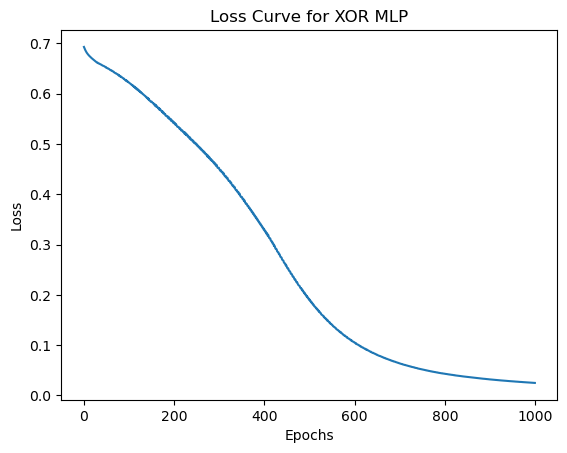

In [180]:
# Plot Loss Curve
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for XOR MLP')
plt.show()


Step 6: Test the Model

In [181]:
with torch.no_grad():

    predictions = model(X)

    print("Raw Model Outputs:", predictions.tolist())

    predictions = (predictions > 0.5).int() # Convert to 0 or 1


    for i in range(len(X)):
        input_values = [int(val) for val in X[i].tolist()]  # Convert floats to integers
        print(f"\nInput {input_values} → Prediction: {int(predictions[i].item())}")



Raw Model Outputs: [[0.029116233810782433], [0.9721524119377136], [0.977391242980957], [0.01845478266477585]]

Input [0, 0] → Prediction: 0

Input [0, 1] → Prediction: 1

Input [1, 0] → Prediction: 1

Input [1, 1] → Prediction: 0
